In [24]:
import numpy as np

download glove.6B.50d.txt here https://www.kaggle.com/watts2/glove6b50dtxt/downloads/glove6b50dtxt.zip/1

## Reading file 

Our first task is to read the vocabulary file which contain vector representation of near about 10,000 words.

In [30]:
def read_glove_vecs(glove_file):
    with open(glove_file, 'r',encoding ="utf8") as f:
        
        words = set()
        word_to_vec_map = {}
        
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
            
    return words, word_to_vec_map

In [31]:
words, w2v_map = read_glove_vecs('glove.6B.50d.txt')

In [34]:
w2v_map['the']# vector representation of word the

array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
       -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
        2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
        1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
       -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
       -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
        4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
        7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
       -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
        1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01])

## Cosine Similarity of two vectors

Using cosine similarity between two words we can find out how much a word is similar to another word.

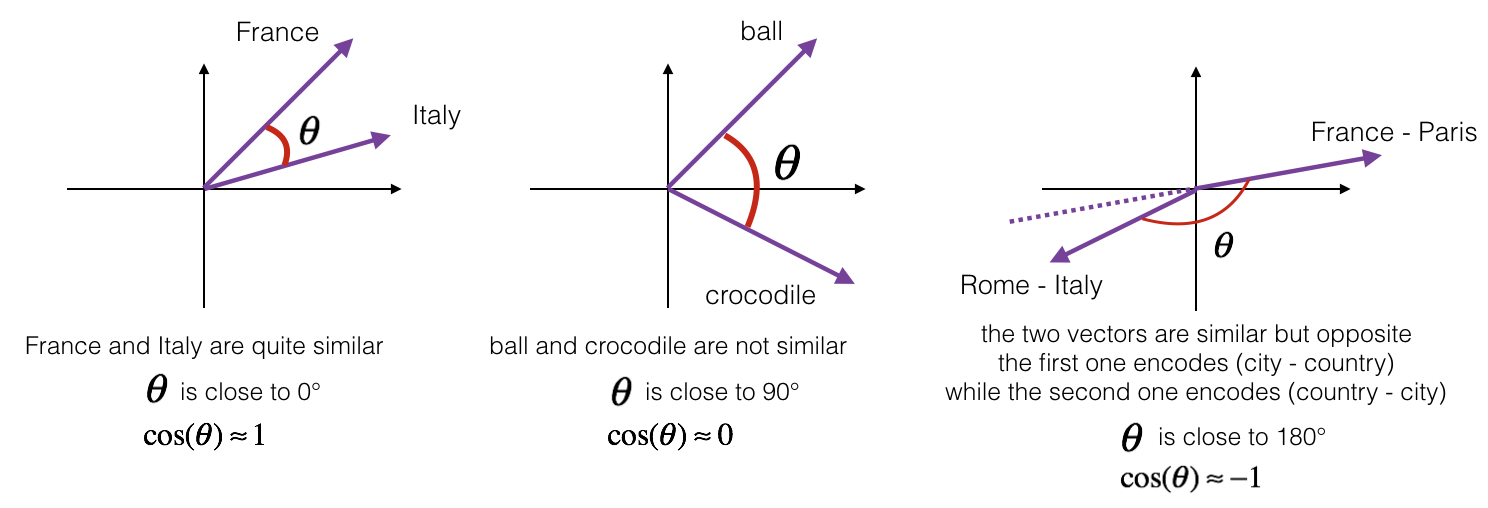

In [35]:
def cosine_similarity(u,v):
    distance = 0.0
    N = np.dot(u,v)
    D = np.linalg.norm(u,2)*np.linalg.norm(v,2)
    
    return N/D

In [36]:
cosine_similarity([1,1,1],[1,0,1])

0.8164965809277259

In [47]:
cosine_similarity(w2v_map['girl'],w2v_map['boy']) # strongly indicating gender similarity

0.9327198629646992

## Analogy Completer function 

This function will complete the analogy of word ,given pair of another words.

In [43]:
def analogy_completer(w_a,w_b,w_c,w2v_map):
    """
    w_a -> word a , w_b -> word b ,  w_c -> word c 
        w2v_map -> word to vector mapping dictionary    """
    
    #making words in lower case format
    w_a = w_a.lower(); 
    w_b = w_b.lower();
    w_c = w_c.lower();
    
    # finding word embeddings  of word a ,b ,c
    e_a = w2v_map[w_a]
    e_b = w2v_map[w_b]
    e_c = w2v_map[w_c]
    
    words = w2v_map.keys()
    max_cosine_sim = -100              # Initialize max_cosine_sim to a large negative number
    best_word = None                   # Initialize best_word with None, it will help keep track of the word to output

    for w in words:        
        # to avoid best_word being one of the input words, pass on them.
        if w in [w_a, w_b, w_c] :
            continue
        
        
       # e_b - e_a ≈ w - e_c
        cosine_sim = cosine_similarity(e_b-e_a, w2v_map[w]-e_c)
        
        # If the cosine_sim is more than the max_cosine_sim 
        # then: set the new max_cosine_sim to the current cosine_sim and the best_word to the current word
        if cosine_sim > max_cosine_sim:
            max_cosine_sim = cosine_sim
            best_word = w
        
    return best_word
    

In [78]:
test_sample = [('italy', 'italian', 'spain'), ('india', 'delhi', 'japan'), ('man', 'woman', 'boy'), ('small', 'smaller', 'large')]
for t in range(len(test_sample)):
    print("{}:{} --> {}:?".format(test_sample[t][0],test_sample[t][1],test_sample[t][2]))

italy:italian --> spain:?
india:delhi --> japan:?
man:woman --> boy:?
small:smaller --> large:?


In [79]:
for t in range(len(test_sample)):
    w = analogy_completer(test_sample[t][0],test_sample[t][1],test_sample[t][2],w2v_map)
    print("{}:{} --> {}:{}".format(test_sample[t][0],test_sample[t][1],test_sample[t][2], w))
toc =time.time()

italy:italian --> spain:spanish
india:delhi --> japan:tokyo
man:woman --> boy:girl
small:smaller --> large:larger
